<a href="https://colab.research.google.com/github/LeeSeungwon89/Machine-learning_Theory/blob/master/4-2%20%ED%99%95%EB%A5%A0%EC%A0%81%20%EA%B2%BD%EC%82%AC%20%ED%95%98%EA%B0%95%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **확률적 경사 하강법**


## **점진적인 학습**

**점진적 학습(=온라인 학습)**은 훈련한 모델을 버리지 않고 새로운 데이터만 조금씩 추가하여 훈련하는 방법입니다. 훈련에 사용한 데이터를 유지할 필요도 없고 이전에 훈련한 내용을 초기화할 필요도 없습니다. 대표적인 점진적 학습 알고리즘은 **확률적 경사 하강법(Stochastic Gradient Descent)**입니다.

### **확률적 경사 하강법**

**확률적 경사 하강법(Stochastic Gradient Descent)**은 가장 가파른 경사를 따라 최적 지점에 도달하는 것을 목표로 삼은 방법입니다. 훈련 세트에서 샘플 하나만 확률적으로 랜덤하게 골라서 가장 가파른 길을 찾고, 또 다른 샘플 하나를 랜덤하게 선택하여 경사를 조금 내려갑니다. 이렇게 전체 샘플을 모두 사용할 때까지 반복합니다. 훈련 세트를 한 번 모두 사용하는 과정을 **에포크(epoch)**라고 부릅니다. 샘플을 모두 사용했는데 만족할 만한 위치까지 경사를 모두 내려오지 못했다면 처음으로 돌아가 다시 경사를 내려옵니다. 수십, 수백 번 이상 에포크를 수행합니다.

확률적 경사 하강법은 신경망 알고리즘에서 꼭 사용합니다. 신경망 알고리즘은 일반적으로 많은 데이터를 사용하기 때문에 한 번에 모든 데이터를 사용하기도 어렵고, 모델이 매우 복잡하기 때문에 수학적 방법으로 해답을 얻기도 쉽지 않기 때문입니다.

#### **미니배치 경사 하강법**

**미니배치 경사 하강법(Minibatch gradiant descent)**은 하나의 샘플이 아닌 무작위로 몇 개의 샘플을 선택해서 경사를 내려갑니다. 실전에서 매우 많이 사용하며, 특히 신경망 알고리즘에서 많이 사용합니다.

#### **배치 경사 하강법**

**배치 경사 하강법(Batch gradiant descent)**은 경사를 한 번 내려오기 위해 전체 샘플을 사용합니다. 전체 샘플을 사용하므로 가장 안정적인 방법일 수 있으나 컴퓨터 자원을 많이 사용합니다. 데이터가 지나치게 많으면 전체 데이터를 모두 읽지 못할 수도 있습니다.

### **손실 함수**

**손실 함수(loss function)(=비용 함수(cost function))**는 경사 하강법으로 내려오는 경사를 의미하며, 머신러닝 알고리즘이 얼마나 엉터리인지 측정하는 기준입니다. 확률적 경사 하강법이 최적화할 대상으로 볼 수 있습니다. 손실 함수의 값은 작을수록 좋습니다.

**비용 함수(cost function)**는 훈련 세트에 있는 모든 샘플에 대한 손실 함수의 합을 의미합니다. 보통 손실 함수와 구분하지 않고 섞어서 사용합니다.

손실 함수는 샘플 하나에 대한 손실을 정의합니다. 분류에서 손실이란 정답을 못 맞히는 것입니다. 예컨대 도미는 양성 클래스(1), 빙어는 음성 클래스(0)일 때, 다음과 같은 예측과 정답을 가정하겠습니다.

- 첫 번째 타깃은 1이고, 1로 예측하여 맞혔습니다. 예측 확률은 0.9입니다.

- 두 번째 타깃은 1이고, 0으로 예측하여 틀렸습니다. 예측 확률은 0.3입니다.
 
- 세 번째 타깃은 0이고, 0으로 예측하여 맞혔습니다. 예측 확률은 0.2입니다.
 
- 네 번째 타깃은 0이고, 1로 예측하여 틀렸습니다. 예측 확률은 0.8입니다.
 
4개 중 2개를 맞혔으니 예측 정확도는 0.5입니다. 만약 정확도에 음수를 취하면 -1이 가장 낮고, -0.0은 가장 높습니다. 다만 이렇게 4개의 샘플만 있다면 정확도는 0, 0.25, 0.5, 0.75, 1로 5개만 도출되므로 경사 하강법을 활용하여 조금씩 내려올 수 없습니다. 경사가 좀 더 연속적일 필요가 있습니다. 기술적으로 손실 함수는 미분이 가능해야 합니다. 

#### **로지스틱 손실 함수**

**로지스틱 손실 함수(logistic loss function)(=이진 크로스엔트로피 손실 함수(Binary cross-entropy loss function)**는 이진 분류에 사용하는 손실 함수입니다. 이 손실 함수를 사용하면 로지스틱 회귀 모델이 생성됩니다. 손실 함수를 직접 만드는 일은 없지만 관련 내용을 간단하게나마 살펴보겠습니다. 

첫 번째 샘플에 대한 예측 확률은 0.9로 가정했습니다. 0.9에 양성 클래스 타깃인 1과 곱하고 음수로 취합니다. 이때 예측이 1에 가까울수록 좋은 모델이며, 예측과 타깃의 곱의 음수는 점점 작아집니다.

$$0.9 \times 1 -> -0.9$$

두 번째 샘플에 대한 예측 확률은 0.3으로 가정했습니다. 0.3에 양성 클래스 타깃인 1과 곱하고 음수로 취합니다.

$$0.3 \times 1 -> -0.3$$

첫 번째 샘플의 -0.9보다 0에 더 가까운 -0.3입니다. 0에 더 가까울수록 높은 손실로 여깁니다.

세 번째 샘플에 대한 예측 확률은 0.2로 가정했습니다. 다만 양성 클래스 1이 아닌 음성 클래스 0이 타깃입니다. 음성 클래스 0과 예측 확률 0.2를 곱하면 무조건 0이 되므로 타깃을 양성 클래스처럼 바꾸는 작업이 필요합니다. 양성 클래스 1에서 예측 확률을 빼면 됩니다.

$$1 - 0.2 = 0.8$$

0.8에 1을 곱하고 음수를 취하는 것은 동일합니다.

$$0.8 \times 1 -> -0.8$$

네 번째 샘플에 대한 예측 확률은 0.8로 가정했습니다. 이 샘플의 타깃도 음성 클래스 0입니다. 세 번째 샘플에서 수행한 작업과 같은 방식을 취하면 됩니다.

$$1 - 0.8 = 0.2$$

$$0.2 \times 1 -> -0.2$$

결론적으로 첫 번째, 세 번째 샘플은 제대로 예측했으므로 손실이 낮고, 두 번째, 네 번째 샘플은 예측에 실패했으므로 손실이 높습니다. 다시 한 번 강조하지만 0에 더 가까울수록 높은 손실로 여깁니다.

이 예측 확률들에 로그 함수를 적용하면, 예측 확률의 범위(0 ~ 1)에서 로그 함수는 음수가 되므로 최종 손실 값은 양수가 됩니다. 손실이 양수가 되면 이해하기 더 수월합니다. 아울러 로그 함수는 0에 가까울수록 아주 큰 음수가 되므로 손실을 아주 크게 만들어서 모델에 큰 영향을 미칠 수도 있습니다. 타깃이 1일 때 $-log(예측 확률)$로 계산하고, 예측 확률이 1에서 멀어질수록 손실은 아주 큰 양수입니다. 타깃이 0일 때 $-log(1-예측 확률)$로 계산하고, 예측 확률이 0에서 멀어질수록 손실은 아주 큰 양수입니다.

참고로 다중 분류의 경우 **크로스엔트로피 손실 함수(cross-entropy function)**를 사용합니다. 실무에서는 이진 분류와 다중 분류를 구분하지 않고 크로스엔트로피 손실 함수로 부르는 경우도 많습니다.

회귀의 경우 손실 함수로 **평균 절댓값 오차**(타깃에서 예측을 뺀 절댓값을 모든 샘플에 평균한 값) 또는 **평균 제곱 오차**(타깃에서 예측을 뺀 값을 제곱한 다음 모든 샘플에 평균한 값)를 사용합니다. 값이 작을수록 좋은 모델입니다.

## **SGDClassifier**

`SGDClassifier` 클래스는 확률적 경사 하강법을 제공하는 대표적인 분류용 클래스입니다. 관련 매개변수 목록은 아래와 같습니다.

- `loss`: 손실 함수의 종류를 지정하는 매개변수입니다. `log`는 로지스틱 손실 함수입니다. 기본값은 `hinge`이며 **힌지 손실(hinge loss)**을 의미합니다. 아래에서 설명하겠습니다.

- `penalty`: 규제의 종류를 지정하는 매개변수입니다. 기본값은 `l2`이며 L2 규제를 의미합니다.

- `alpha`: 규제 강도를 지정하는 매개변수입니다. 기본값은 `0.0001`입니다.

- `max_iter`: 수행할 에포크 횟수를 지정하는 매개변수입니다. `10`이면 10회를 반복합니다.

- `tol`: 반복을 멈출 조건을 지정하는 매개변수입니다. 기본값은 `0.001`입니다.

- `n_iter_no_change`: 손실이 `tol`만큼 줄어들지 않으면 알고리즘이 중단되도록 에포크를 지정하는 매개변수입니다. 기본값은 `5`입니다.

`SGDRegressor` 클래스는 확률적 경사 하강법을 사용한 회귀 모델을 만드는 클래스입니다. `SGDClassifier` 클래스에서 사용하는 매개변수와 동일하게 사용하지만 매개변수 하나가 다릅니다.

   - `loss`: 손실 함수의 종류를 지정하는 매개변수입니다. 기본값은 `squared_loss`이며 제곱 오차를 의미합니다.

### **데이터 준비**

데이터를 준비하겠습니다.

In [2]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
print(fish)
print()
print(fish.info())

    Species  Weight  Length  Diagonal   Height   Width
0     Bream   242.0    25.4      30.0  11.5200  4.0200
1     Bream   290.0    26.3      31.2  12.4800  4.3056
2     Bream   340.0    26.5      31.1  12.3778  4.6961
3     Bream   363.0    29.0      33.5  12.7300  4.4555
4     Bream   430.0    29.0      34.0  12.4440  5.1340
..      ...     ...     ...       ...      ...     ...
154   Smelt    12.2    12.2      13.4   2.0904  1.3936
155   Smelt    13.4    12.4      13.5   2.4300  1.2690
156   Smelt    12.2    13.0      13.8   2.2770  1.2558
157   Smelt    19.7    14.3      15.2   2.8728  2.0672
158   Smelt    19.9    15.0      16.2   2.9322  1.8792

[159 rows x 6 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  1

'Species' 열을 타깃으로 삼고, 나머지 열은 입력 데이터로 삼겠습니다.

In [3]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

훈련 세트와 테스트 세트로 나누겠습니다.

In [4]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

훈련 세트와 테스트 세트의 특성을 표준화 전처리 하겠습니다.

In [5]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

### **SGDClassifier 클래스로 모델 훈련하기**

`SGDClassifier` 클래스로 모델을 훈련하겠습니다. 손실 함수는 로지스틱 손실 함수로 지정하고, 반복 횟수는 10번으로 지정하겠습니다. 

In [11]:
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

print(f'훈련 세트 점수:   {sc.score(train_scaled, train_target)}')
print(f'테스트 세트 점수: {sc.score(test_scaled, test_target)}')

훈련 세트 점수:   0.773109243697479
테스트 세트 점수: 0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


과소적합입니다. `ConvergenceWarning` 경고가 뜨는 이유는 모델이 충분히 수렴하지 않았다는 의미입니다. `max_iter` 매개변수의 값을 늘려서 반복 횟수를 늘리는 편이 좋습니다.

모델을 이어서 훈련해보겠습니다. 확률적 경사 하강법은 점진적 학습이 가능하므로 새로운 인스턴스를 선언하지 않고 기존 인스턴스로 지속해서 훈련할 수 있습니다. 지속해서 훈련하려면 `partial_fit()` 메서드를 사용합니다. 한 번 사용할 때마다 1 에포크씩 거치며 훈련합니다.

In [12]:
sc.partial_fit(train_scaled, train_target, )
print(f'훈련 세트 점수:   {sc.score(train_scaled, train_target)}')
print(f'테스트 세트 점수: {sc.score(test_scaled, test_target)}')

훈련 세트 점수:   0.8151260504201681
테스트 세트 점수: 0.825


정확도가 향상되었지만 여전히 과소적합입니다. `train_scaled`와 `train_target`을 한꺼번에 사용했으니 확률적 경사 하강법이 아닌 배치 경사 하강법으로 여길 수도 있습니다. 그러나 `SGDClassifier` 클래스는 훈련 세트에서 1개씩 샘플을 꺼내어 경사 하강법 단계를 수행하는 클래스입니다. 미니배치 경사 하강법이나 배치 하강법을 제공하지 않습니다.

### **에포크와 과대/과소적합**

에포크 횟수에 따라 과대적합과 과소적합의 여부가 결정됩니다. 에포크 횟수가 적으면 모델이 훈련 세트를 덜 학습합니다. 경사를 덜 내려와서 과소적합 모델이 될 가능성이 높습니다. 반면 에포크 횟수가 많으면 모델이 훈련 세트를 완전히 학습합니다. 경사를 많이 내려와서 훈련 세트에 잘 맞는 모델이 만들어집니다. 과대적합 모델이 될 가능성이 높습니다. 에포크 횟수가 지나치게 많으면 과대적합 모델이 만들어지므로 **조기 종료(Early stopping)**를 통해 적절한 에포크 횟수에서 멈춰야 합니다.

#### **적절한 에포크 찾고 조기 종료 하기**

적절한 에포크를 찾기 위해 그래프를 그리겠습니다. 반복 횟수는 지정하지 않고 `partial_fit()` 메서드만 사용하겠습니다. 참고로 `partial_fit()` 메서드만 사용하려면 훈련 세트에 있는 전체 클래스 레이블을 `partial_fit()` 메서드에 있는 `classes` 매개변수에 전달해줘야 합니다. `classes` 매개변수에 전달하기 위해 `train_target`에 있는 생선 7종을 가진 리스트를 만들어야 합니다.

In [14]:
import numpy as np

sc = SGDClassifier(loss='log', random_state=42)

train_score = []
test_score = []

# 생선 7종을 가진 리스트를 생성합니다.
classes = np.unique(train_target)
print(classes)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


에포크 300번 동안 훈련을 반복하겠습니다. 

In [15]:
for _ in range(1, 300):    # `_`는 나중에 사용하지 않고 그냥 버리는 값을 넣어두는 용도입니다.
    # 생선 7종을 가진 리스트를 `classes` 매개변수에 전달합니다.
    sc.partial_fit(train_scaled, train_target, classes=classes)

    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

각 리스트에 전달한 점수를 그래프로 그리겠습니다.

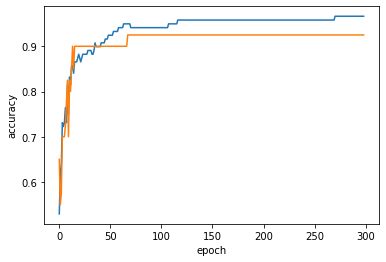

In [18]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.show()

백 번째 에포크 이후부터 훈련 세트와 테스트 테스의 점수가 점점 벌어지고 있습니다. 훈련 세트와 테스트 세트 점수가 가장 가까운 에포크가 적절한 에포크이므로 백 번째 에포크가 최적 반복 횟수입니다.

`SGDClassifier` 클래스는 일정 에포크 동안 성능이 향상되지 않으면 훈련을 자동으로 멈춥니다. `tol` 매개변수는 반복을 멈출 조건을 지정하는 매개변수입니다. 성능이 향상될 최솟값을 지정합니다. 여기선 멈출 조건을 `None`으로 지정하여 자동으로 멈추지 않고 100번만큼 무조건 반복하도록 설정하겠습니다.

In [23]:
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(f'훈련 세트 점수:   {sc.score(train_scaled, train_target)}')
print(f'테스트 세트 점수: {sc.score(test_scaled, test_target)}')

훈련 세트 점수:   0.957983193277311
테스트 세트 점수: 0.925


### **힌지 손실**

참고로 `SGDClassifier` 클래스의 `loss` 매개변수의 기본값은 `hinge`이며, 이는 **힌지 손실(hinge loss)**을 의미합니다. 힌지손실은 **서포트 벡터 머신(support vector machine)** 머신러닝 알고리즘을 위한 손실 함수입니다. 서포트 벡터 머신에 대한 내용은 [링크](https://hleecaster.com/ml-svm-concept/)를 참조하시기 바랍니다.

In [25]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(f'훈련 세트 점수:   {sc.score(train_scaled, train_target)}')
print(f'테스트 세트 점수: {sc.score(test_scaled, test_target)}')

훈련 세트 점수:   0.9495798319327731
테스트 세트 점수: 0.925
